In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Quarterly Data.csv', skiprows=[1,2])
df['sasdate'] = pd.to_datetime(df['sasdate'], format='%m/%d/%Y')

In [8]:
# List of variables we want to predict
gov_vars = [
    'GCEC1',                  # Main government spending
    'A823RL1Q225SBEA',       # Federal spending
    'FGRECPTx',              # Federal receipts
    'SLCEx',                 # State/local spending
    'USGOVT',                # All government employees
    'CES9091000001',         # Federal employees
    'CES9092000001',         # State employees
    'CES9093000001'          # Local employees
]

In [20]:
# Create a dictionary to store our predictions
predictions = {}
future_dates_dict = {}

# For each variable, create a simple time-based prediction
for var in gov_vars:
    # Get the data for this variable
    data = df[['sasdate', var]].dropna()
    
    # Create a time index (0, 1, 2, ...) for our X variable
    time_index = np.arange(len(data)).reshape(-1, 1)
    
    # Create and fit the model
    model = LinearRegression()
    model.fit(time_index, data[var])
    
    # Create time indexes for 2025 (next 4 quarters after our data)
    future_index = np.arange(len(data), len(data) + 4).reshape(-1, 1)
    
    # Make predictions
    future_predictions = model.predict(future_index)
    
    # Store predictions and future dates
    predictions[var] = future_predictions
    future_dates_dict[var] = pd.date_range(start=data['sasdate'].iloc[-1], 
                                         periods=5, 
                                         freq='QE')[1:]
    
    # Print predictions
    print(f"\nPredictions for {var} in 2025:")
    for i, pred in enumerate(future_predictions):
        print(f"Q{i+1} 2025: {pred:.2f}")


Predictions for GCEC1 in 2025:
Q1 2025: 3882.29
Q2 2025: 3892.79
Q3 2025: 3903.29
Q4 2025: 3913.79

Predictions for A823RL1Q225SBEA in 2025:
Q1 2025: 1.65
Q2 2025: 1.65
Q3 2025: 1.65
Q4 2025: 1.65

Predictions for FGRECPTx in 2025:
Q1 2025: 3842.81
Q2 2025: 3856.37
Q3 2025: 3869.94
Q4 2025: 3883.50

Predictions for SLCEx in 2025:
Q1 2025: 2472.26
Q2 2025: 2479.52
Q3 2025: 2486.78
Q4 2025: 2494.05

Predictions for USGOVT in 2025:
Q1 2025: 25124.14
Q2 2025: 25180.80
Q3 2025: 25237.46
Q4 2025: 25294.11

Predictions for CES9091000001 in 2025:
Q1 2025: 2930.24
Q2 2025: 2930.98
Q3 2025: 2931.71
Q4 2025: 2932.45

Predictions for CES9092000001 in 2025:
Q1 2025: 5939.79
Q2 2025: 5954.59
Q3 2025: 5969.40
Q4 2025: 5984.20

Predictions for CES9093000001 in 2025:
Q1 2025: 16254.11
Q2 2025: 16295.23
Q3 2025: 16336.35
Q4 2025: 16377.47


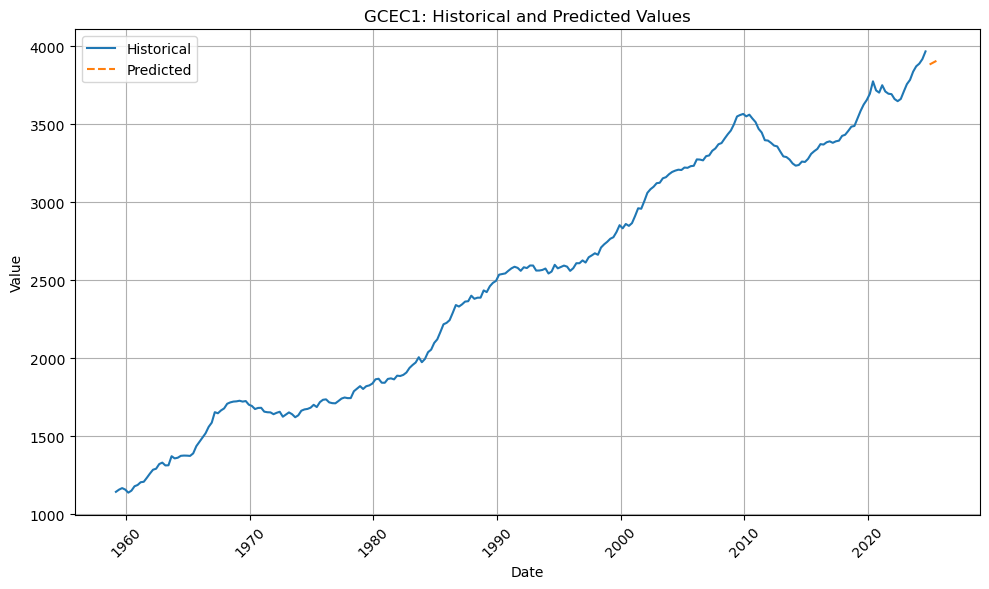

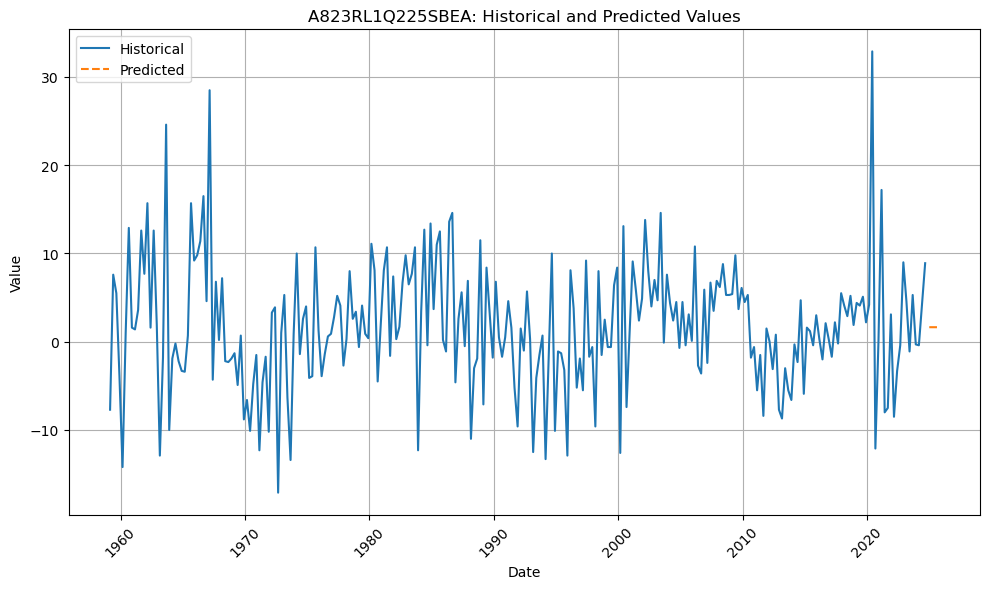

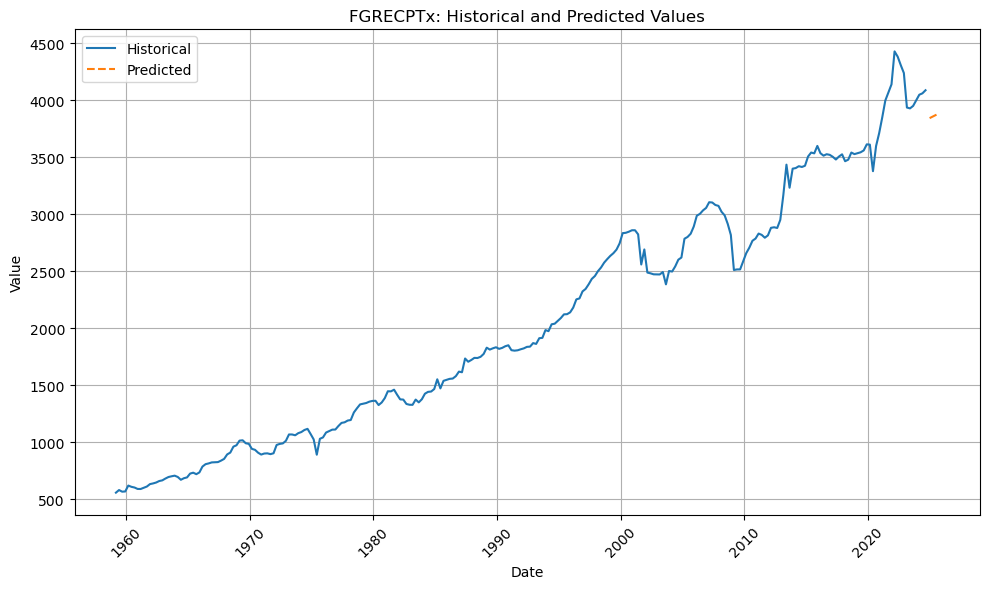

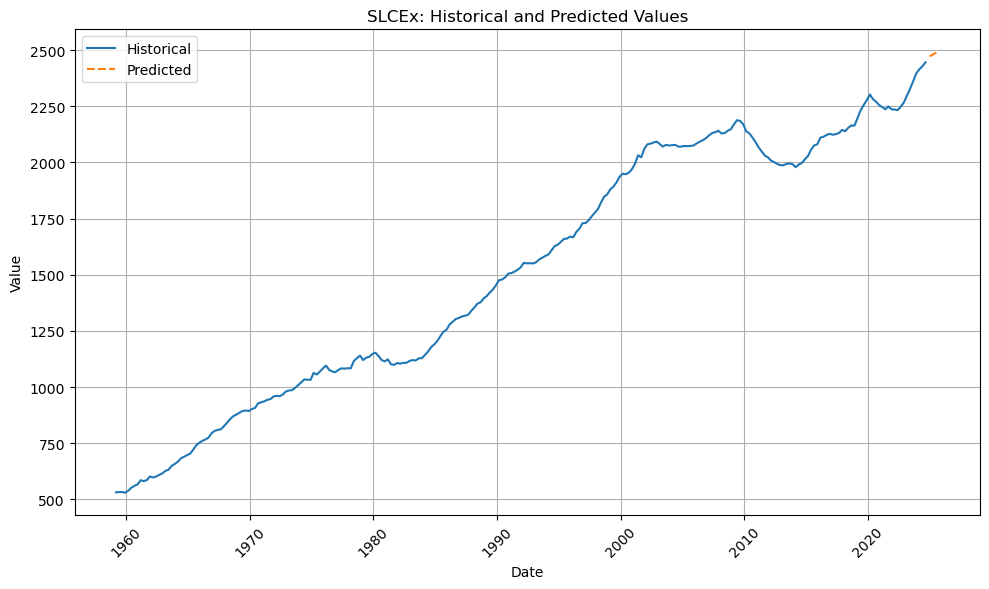

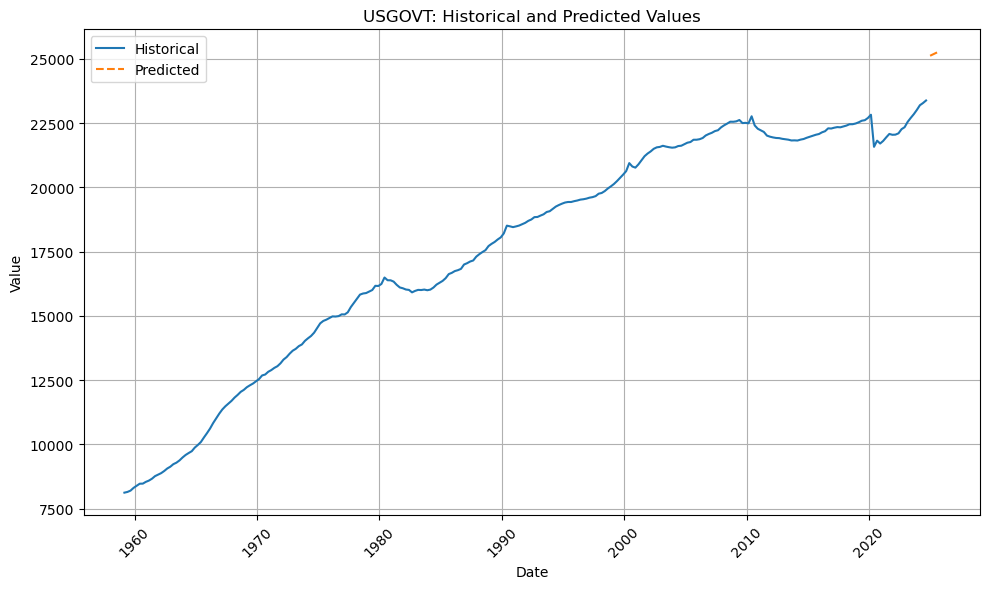

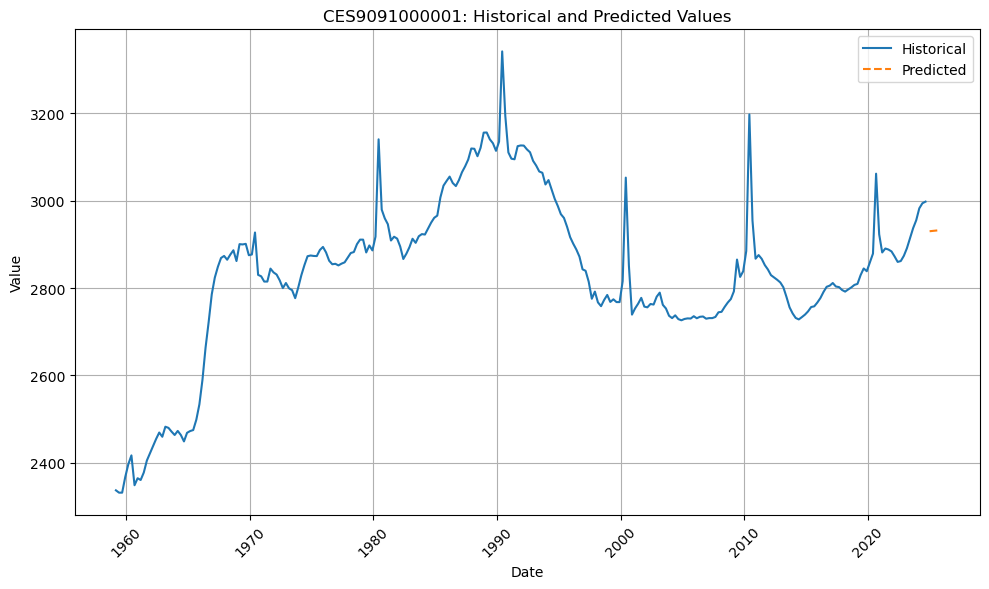

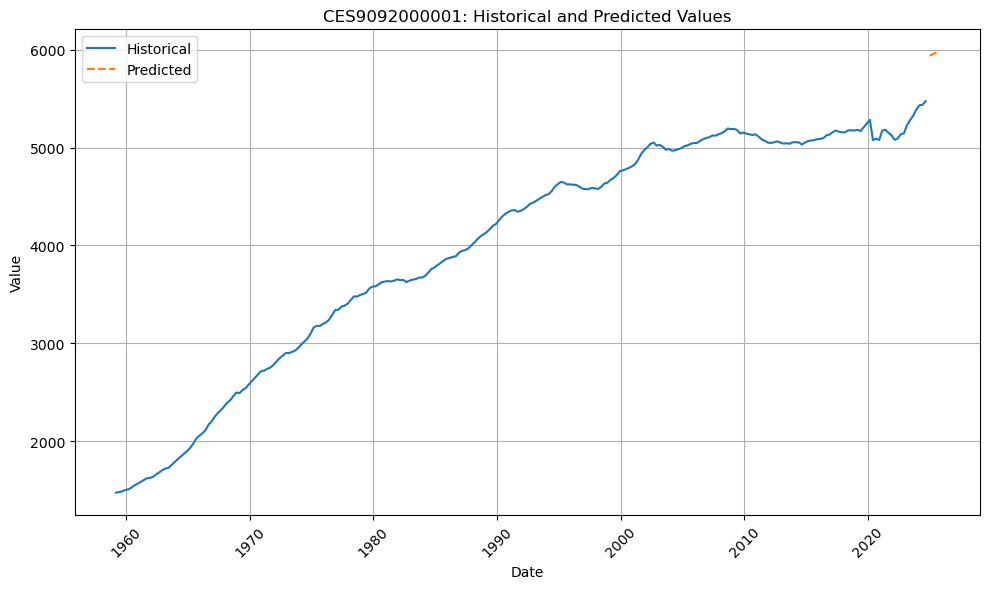

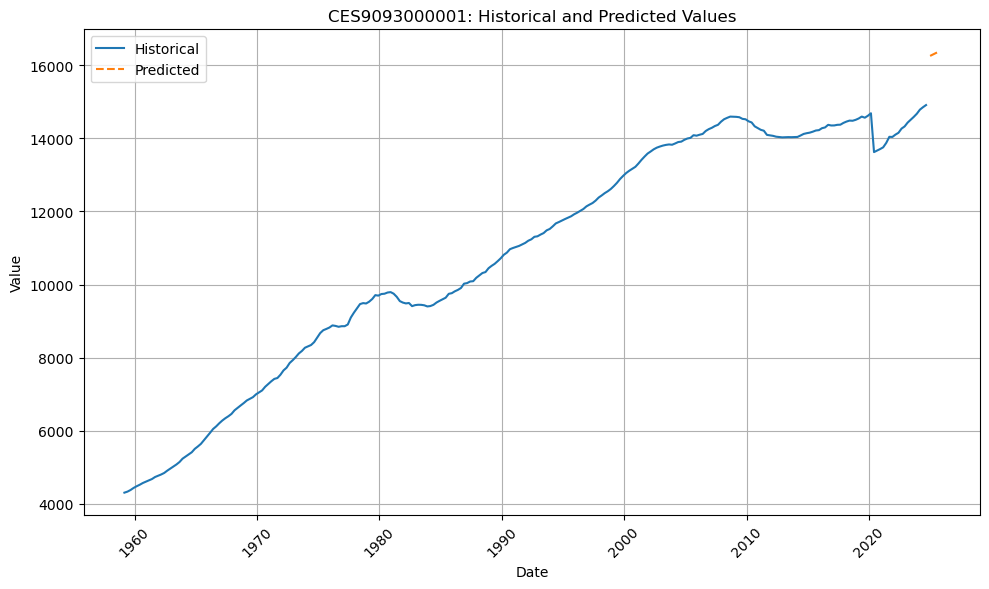

In [22]:
# Create plots for each variable
for var in gov_vars:
    # Get the data for this variable
    data = df[['sasdate', var]].dropna()
    
    # Create plot
    plt.figure(figsize=(10, 6))
    
    # Plot historical data
    plt.plot(data['sasdate'], data[var], label='Historical')
    
    # Plot predictions
    plt.plot(future_dates_dict[var], predictions[var], '--', label='Predicted')
    
    plt.title(f'{var}: Historical and Predicted Values')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
import seaborn as sns
from sklearn.metrics import r2_score

# Define our dependent and independent variables
dependent_var = 'GCEC1'
independent_vars = [
    'A823RL1Q225SBEA',  # Federal spending
    'FGRECPTx',         # Federal receipts
    'SLCEx',            # State/local spending
    'USGOVT',           # All government employees
    'CES9091000001',    # Federal employees
    'CES9092000001',    # State employees
    'CES9093000001'     # Local employees
]

In [ ]:
# Create a dataframe with just our variables of interest
model_df = df[independent_vars + [dependent_var]].copy()

# Create correlation matrix
correlation_matrix = model_df.corr()

# Plot correlation matrix using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Government Spending Variables')
plt.tight_layout()
plt.show()


In [ ]:
# Prepare data for regression
X = model_df[independent_vars]
y = model_df[dependent_var]

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate R-squared
r2 = model.score(X, y)
print("\nModel R-squared:", r2)

# Print coefficients for each variable
print("\nModel Coefficients:")
for var, coef in zip(independent_vars, model.coef_):
    print(f"{var}: {coef:.4f}")

In [ ]:
# Now let's predict GCEC1 for 2025 using our component predictions
# Get the predicted 2025 values for our independent variables
X_2025 = pd.DataFrame()
for var in independent_vars:
    X_2025[var] = predictions[var]

# Make predictions for 2025
new_predictions_2025 = model.predict(X_2025)